# Krisch边缘检测算子

由8个卷积核组成Krisch边缘检测算子， 8个卷积核分别对图像卷积，取最大值点作为边缘点。

In [45]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats

In [46]:
src = cv2.imread('../datas/f4.jpg',0)
rgb = cv2.cvtColor(cv2.imread('../datas/f4.jpg'),cv2.COLOR_BGR2RGB)

In [47]:
def kirsch_filter(img):
    KIRSCH_K1   = np.array([[ 5, -3, -3], [ 5,  0, -3], [ 5, -3, -3]], dtype=np.float32) / 15
    KIRSCH_K2   = np.array([[-3, -3,  5], [-3,  0,  5], [-3, -3,  5]], dtype=np.float32) / 15
    KIRSCH_K3   = np.array([[-3, -3, -3], [ 5,  0, -3], [ 5,  5, -3]], dtype=np.float32) / 15
    KIRSCH_K4   = np.array([[-3,  5,  5], [-3,  0,  5], [-3, -3, -3]], dtype=np.float32) / 15
    KIRSCH_K5   = np.array([[-3, -3, -3], [-3,  0, -3], [ 5,  5,  5]], dtype=np.float32) / 15
    KIRSCH_K6   = np.array([[ 5,  5,  5], [-3,  0, -3], [-3, -3, -3]], dtype=np.float32) / 15
    KIRSCH_K7   = np.array([[-3, -3, -3], [-3,  0,  5], [-3,  5,  5]], dtype=np.float32) / 15
    KIRSCH_K8   = np.array([[ 5,  5, -3], [ 5,  0, -3], [-3, -3, -3]], dtype=np.float32) / 15
    
    """ Return a gray-scale image that's been Kirsch edge filtered. """
    if  img.ndim > 2 :
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    fimg    = np.maximum(cv2.filter2D(img, cv2.CV_8U, KIRSCH_K1),
              np.maximum(cv2.filter2D(img, cv2.CV_8U, KIRSCH_K2),
              np.maximum(cv2.filter2D(img, cv2.CV_8U, KIRSCH_K3),
              np.maximum(cv2.filter2D(img, cv2.CV_8U, KIRSCH_K4),
              np.maximum(cv2.filter2D(img, cv2.CV_8U, KIRSCH_K5),
              np.maximum(cv2.filter2D(img, cv2.CV_8U, KIRSCH_K6),
              np.maximum(cv2.filter2D(img, cv2.CV_8U, KIRSCH_K7),
                            cv2.filter2D(img, cv2.CV_8U, KIRSCH_K8),
                           )))))))
    return(fimg)


In [48]:
def threshold(img, sig = None) :
    """ Threshold a gray image in a way that usually makes sense. """
    if  img.ndim > 2 :
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    med     = np.median(img)
    if  sig is None :
        sig = 0.0       # note: sig can be negative. Another way: Use the %'th percentile-ish pixel.
    co      = int(min(255, max(0, (1.0 + sig) * med)))
    return(cv2.threshold(img, co, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)[1])

In [49]:
def kirsch_filter_rgb(img):
    KIRSCH_K1   = np.array([[ 5, -3, -3], [ 5,  0, -3], [ 5, -3, -3]], dtype=np.float32) / 15
    KIRSCH_K2   = np.array([[-3, -3,  5], [-3,  0,  5], [-3, -3,  5]], dtype=np.float32) / 15
    KIRSCH_K3   = np.array([[-3, -3, -3], [ 5,  0, -3], [ 5,  5, -3]], dtype=np.float32) / 15
    KIRSCH_K4   = np.array([[-3,  5,  5], [-3,  0,  5], [-3, -3, -3]], dtype=np.float32) / 15
    KIRSCH_K5   = np.array([[-3, -3, -3], [-3,  0, -3], [ 5,  5,  5]], dtype=np.float32) / 15
    KIRSCH_K6   = np.array([[ 5,  5,  5], [-3,  0, -3], [-3, -3, -3]], dtype=np.float32) / 15
    KIRSCH_K7   = np.array([[-3, -3, -3], [-3,  0,  5], [-3,  5,  5]], dtype=np.float32) / 15
    KIRSCH_K8   = np.array([[ 5,  5, -3], [ 5,  0, -3], [-3, -3, -3]], dtype=np.float32) / 15
    
    """ Return a gray-scale image that's been Kirsch edge filtered. """
    if  img.ndim <= 2 :
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    fimg    = np.maximum(cv2.filter2D(img, cv2.CV_8UC3, KIRSCH_K1),
              np.maximum(cv2.filter2D(img, cv2.CV_8UC3, KIRSCH_K2),
              np.maximum(cv2.filter2D(img, cv2.CV_8UC3, KIRSCH_K3),
              np.maximum(cv2.filter2D(img, cv2.CV_8UC3, KIRSCH_K4),
              np.maximum(cv2.filter2D(img, cv2.CV_8UC3, KIRSCH_K5),
              np.maximum(cv2.filter2D(img, cv2.CV_8UC3, KIRSCH_K6),
              np.maximum(cv2.filter2D(img, cv2.CV_8UC3, KIRSCH_K7),
                            cv2.filter2D(img, cv2.CV_8UC3, KIRSCH_K8),
                           )))))))
    return(fimg)

In [50]:
dst_gray = kirsch_filter(src)

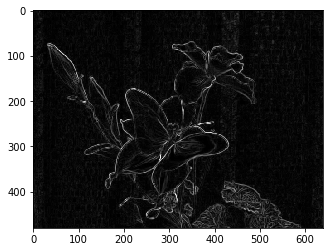

In [51]:
plt.imshow(dst_gray,'gray')

In [52]:
dst_rgb = kirsch_filter_rgb(rgb)

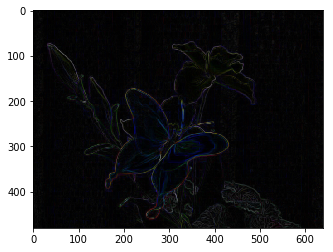

In [53]:
plt.imshow(dst_rgb)